In [16]:
import sys
sys.path.insert(0, '../')
import numpy as np
import data_loader as dl
from utils.rolling_window import rolling_window
from visual import display
# from giotto.diagrams.features import PersistenceEntropy
# from giotto.homology import CubicalPersistence
from persistance.filtrations import thickening_3D

In [17]:
dir = '/Users/julian/temp/vessels_tests'
clinical_inputs, ct_inputs, ct_lesion_GT, mri_inputs, mri_lesion_GT, brain_masks, ids, params = dl.load_structured_data(dir, 'data_set.npz')
test = np.squeeze(ct_inputs[0])
test_GT = ct_lesion_GT[0]
n_x, n_y, n_z = test.shape
print(test.shape)


Loading a total of 113 subjects.
Sequences used: {'ct_sequences': ['wmask_filtered_extracted_betted_Angio'], 'ct_label_sequences': ['wcoreg_VOI'], 'mri_sequences': [], 'mri_label_sequences': []}
0 subjects had been excluded.
(79, 95, 79)


In [18]:
window_d_x = 7
window_d_y = 7
window_d_z = 7
padding = int((max([window_d_x, window_d_y, window_d_z]) - 1) / 2)
padded_test = np.pad(test, ((padding, padding), (padding, padding), (padding, padding)),
                         mode='constant', constant_values=0)
windows = rolling_window(padded_test, (window_d_x, window_d_y, window_d_z))\
                .reshape(n_x * n_y * n_z, window_d_x, window_d_y, window_d_z)
windows_with_frames = np.pad(windows, ((0, 0), (1, 1), (1, 1), (1, 1)), mode='constant', constant_values=1)
windows_with_frames.shape


(592895, 9, 9, 9)

In [20]:

dilation_filtered_images = np.empty(windows_with_frames.shape)

for i in range(windows_with_frames.shape[0]):
   dilation_filtered_images[i] = thickening_3D(windows_with_frames[i])

Image center:  4 4 4
Image center value:  5.0


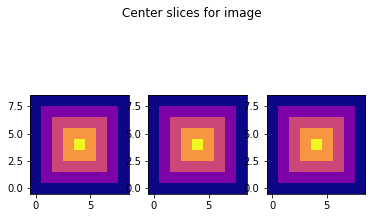

In [25]:

display(dilation_filtered_images[603])
